In [1]:
# prompt: 구글 드라이브 연결

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import datetime
import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

In [3]:
# os.listdir("/content/drive/MyDrive/데이콘/data")

In [4]:
# os.listdir(os.path.join('/content', 'drive', 'MyDrive', '데이콘', 'data'))

In [11]:
# os.path.join('/content', 'drive', 'MyDrive', '데이콘', 'data')

In [12]:
dirname = os.path.join('/content', 'drive', 'MyDrive', '데이콘', 'data')
print(os.listdir(dirname))

['train_heat.csv']


In [13]:
df_raw = pd.read_csv(os.path.join(dirname, 'train_heat.csv'), index_col=0).reset_index(drop=True)
df_raw['train_heat.tm'] = df_raw['train_heat.tm'].astype(str)
df_raw['train_heat.tm'] = pd.to_datetime(df_raw['train_heat.tm'], format="%Y%m%d%H")
df_raw['train_heat.branch_id'] = df_raw['train_heat.branch_id'].astype('category')

In [14]:
print(df_raw.shape)
df_raw.head()

(499301, 11)


,train_heat.tm,train_heat.branch_id,train_heat.ta,train_heat.wd,train_heat.ws,train_heat.rn_day,train_heat.rn_hr1,train_heat.hm,train_heat.si,train_heat.ta_chi,train_heat.heat_demand
0,2021-01-01 01:00:00,A,-10.1,78.3,0.5,0.0,0.0,68.2,-99.0,-8.2,281
1,2021-01-01 02:00:00,A,-10.2,71.9,0.6,0.0,0.0,69.9,-99.0,-8.6,262
2,2021-01-01 03:00:00,A,-10.0,360.0,0.0,0.0,0.0,69.2,-99.0,-8.8,266
3,2021-01-01 04:00:00,A,-9.3,155.9,0.5,0.0,0.0,65.0,-99.0,-8.9,285
4,2021-01-01 05:00:00,A,-9.0,74.3,1.9,0.0,0.0,63.5,-99.0,-9.2,283


In [15]:
df_raw.describe()

,train_heat.tm,train_heat.ta,train_heat.wd,train_heat.ws,train_heat.rn_day,train_heat.rn_hr1,train_heat.hm,train_heat.si,train_heat.ta_chi,train_heat.heat_demand
count,499301,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000,499301.000000
mean,2022-07-02 12:00:00,10.621007,194.322872,-2.344705,-1.843207,-3.649492,53.024052,-45.600886,13.869692,95.861923
min,2021-01-01 01:00:00,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,2021-10-01 18:00:00,4.400000,105.000000,0.500000,0.000000,0.000000,44.900000,-99.000000,4.400000,25.000000
50%,2022-07-02 12:00:00,14.200000,212.100000,1.100000,0.000000,0.000000,64.700000,0.000000,15.000000,55.000000
75%,2023-04-02 06:00:00,22.500000,294.300000,2.000000,0.000000,0.000000,82.500000,0.960000,24.300000,116.000000
max,2023-12-31 23:00:00,37.800000,360.000000,11.900000,326.500000,92.500000,100.000000,3.920000,37.100000,966.000000
std,NaN,20.878917,118.348853,19.161911,21.340679,19.082926,49.080340,49.938291,11.888126,115.269280


In [16]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499301 entries, 0 to 499300
Data columns (total 11 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   train_heat.tm           499301 non-null  datetime64[ns]
 1   train_heat.branch_id    499301 non-null  category      
 2   train_heat.ta           499301 non-null  float64       
 3   train_heat.wd           499301 non-null  float64       
 4   train_heat.ws           499301 non-null  float64       
 5   train_heat.rn_day       499301 non-null  float64       
 6   train_heat.rn_hr1       499301 non-null  float64       
 7   train_heat.hm           499301 non-null  float64       
 8   train_heat.si           499301 non-null  float64       
 9   train_heat.ta_chi       499301 non-null  float64       
 10  train_heat.heat_demand  499301 non-null  int64         
dtypes: category(1), datetime64[ns](1), float64(8), int64(1)
memory usage: 38.6 MB


In [17]:
def add_timeseries_columns(df):
    ## copy
    df_preprocess = df.copy()

    ## timepoints
    df_preprocess['date'] = df_preprocess['train_heat.tm'].dt.date
    df_preprocess['year'] = df_preprocess['train_heat.tm'].dt.year
    df_preprocess['month'] = df_preprocess['train_heat.tm'].dt.month
    df_preprocess['day'] = df_preprocess['train_heat.tm'].dt.day
    df_preprocess['hour'] = df_preprocess['train_heat.tm'].dt.hour

    ## days
    for i in tqdm.trange(len(df_preprocess)):
        df_preprocess.loc[i,'days'] = datetime.date(df_preprocess.loc[i,'year'], df_preprocess.loc[i,'month'], df_preprocess.loc[i,'day']).timetuple().tm_yday

    return df_preprocess

In [18]:
df_ts = add_timeseries_columns(df_raw)

100%|██████████| 499301/499301 [02:51<00:00, 2908.33it/s]


In [19]:
df_ts.groupby(by=['date']).mean(numeric_only=True)

,train_heat.ta,train_heat.wd,train_heat.ws,train_heat.rn_day,train_heat.rn_hr1,train_heat.hm,train_heat.si,train_heat.ta_chi,train_heat.heat_demand,year,month,day,hour,days
date,,,,,,,,,,,,,,
2021-01-01,-4.327460,220.118764,0.978719,0.146453,0.016247,8.270938,-51.053867,-4.777117,229.443936,2021.0,1.0,1.0,12.0,1.0
2021-01-02,-3.727632,226.466667,1.541667,-1.910965,-1.951754,-4.910307,-52.758158,-4.894298,225.809211,2021.0,1.0,2.0,11.5,2.0
2021-01-03,-4.564693,225.453289,1.238596,-0.214912,-0.217105,-7.007895,-52.843728,-5.349342,235.309211,2021.0,1.0,3.0,11.5,3.0
2021-01-04,-3.519298,191.220614,0.682456,-0.217105,-0.434211,-1.037281,-52.888377,-3.747807,238.291667,2021.0,1.0,4.0,11.5,4.0
2021-01-05,-3.392544,229.921491,1.622588,-3.685746,-3.690570,-3.046930,-52.800855,-4.999123,235.350877,2021.0,1.0,5.0,11.5,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,1.449342,223.802193,-2.550439,-0.434211,-0.434211,76.477851,-53.234057,1.038596,197.162281,2023.0,12.0,27.0,11.5,361.0
2023-12-28,0.961404,240.083772,-0.999781,-0.434211,-0.868421,77.244737,-53.281930,0.405263,196.247807,2023.0,12.0,28.0,11.5,362.0
2023-12-29,-0.560526,210.167325,-4.002412,-2.171053,-2.605263,68.591886,-53.337785,1.159868,194.107456,2023.0,12.0,29.0,11.5,363.0


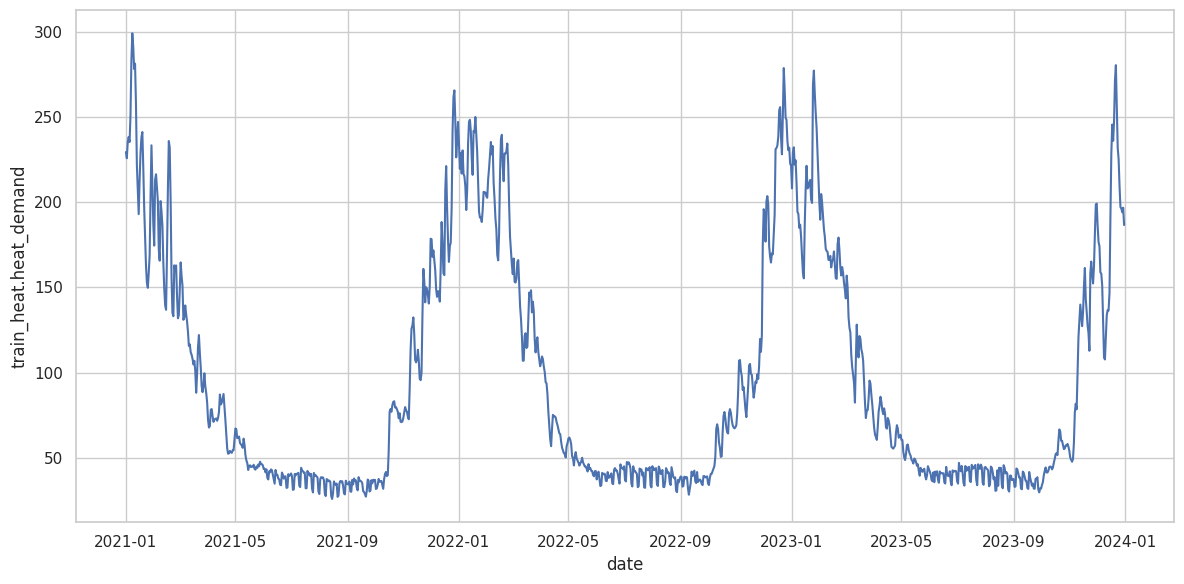

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_ts.groupby(by=['date']).mean(numeric_only=True).reset_index(), x='date', y='train_heat.heat_demand', ax=ax)

plt.tight_layout()
plt.show()

In [21]:
df_ts.groupby(by=['date', 'train_heat.branch_id'], observed=True).mean(numeric_only=True)

train_heat.ta  train_heat.wd  train_heat.ws  \
date       train_heat.branch_id                                                
2021-01-01 A                         -4.656522     189.152174       1.295652   
           B                         -4.686957     190.860870       1.200000   
           C                         -3.743478     195.195652       1.008696   
           D                         -4.343478     206.078261       0.878261   
           E                         -4.343478     206.078261       0.878261   
...                                        ...            ...            ...   
2023-12-31 O                          3.937500     251.741667       1.025000   
           P                          3.579167     290.841667       1.204167   
           Q                          1.283333     227.733333       1.370833   
           R                          6.437500     310.329167       3.100000   
           S                          3.458333     233.520833       1.900000   

                                 train_heat.rn_day  train_heat.rn_hr1  \
date       train_heat.branch_id                                         
2021-01-01 A                              0.000000           0.000000   
           B                              0.000000           0.000000   
           C                              0.000000           0.000000   
           D                              0.000000           0.000000   
           E                              0.000000           0.000000   
...                                            ...                ...   
2023-12-31 O                              1.554167           0.125000   
           P                              1.325000           0.095833   
           Q                              5.458333           0.291667   
           R                              1.604167           0.083333   
           S                              2.104167           0.104167   

                                 train_heat.hm  train_heat.si  \
date       train_heat.branch_id                                 
2021-01-01 A                         59.130435     -51.237391   
           B                        -99.000000     -51.237391   
           C                         58.634783     -51.237391   
           D                        -99.000000     -51.277391   
           E                        -99.000000     -51.277391   
...                                        ...            ...   
2023-12-31 O                         81.620833     -53.592917   
           P                         89.291667     -53.586250   
           Q                         93.337500     -53.365833   
           R                         83.425000     -53.545000   
           S                         93.254167     -53.526667   

                                 train_heat.ta_chi  train_heat.heat_demand  \
date       train_heat.branch_id                                              
2021-01-01 A                             -5.017391              278.086957   
           B                             -5.795652              573.956522   
           C                             -4.608696              611.739130   
           D                             -4.717391              385.695652   
           E                             -4.717391              102.695652   
...                                            ...                     ...   
2023-12-31 O                              3.075000              142.458333   
           P                              3.020833              182.625000   
           Q                              0.570833              124.000000   
           R                              4.850000               25.041667   
           S                              1.945833               28.875000   

                                   year  month   day  hour   days  
date       train_heat.branch_id                                    
2021-01-01 A                     2021.0    1.

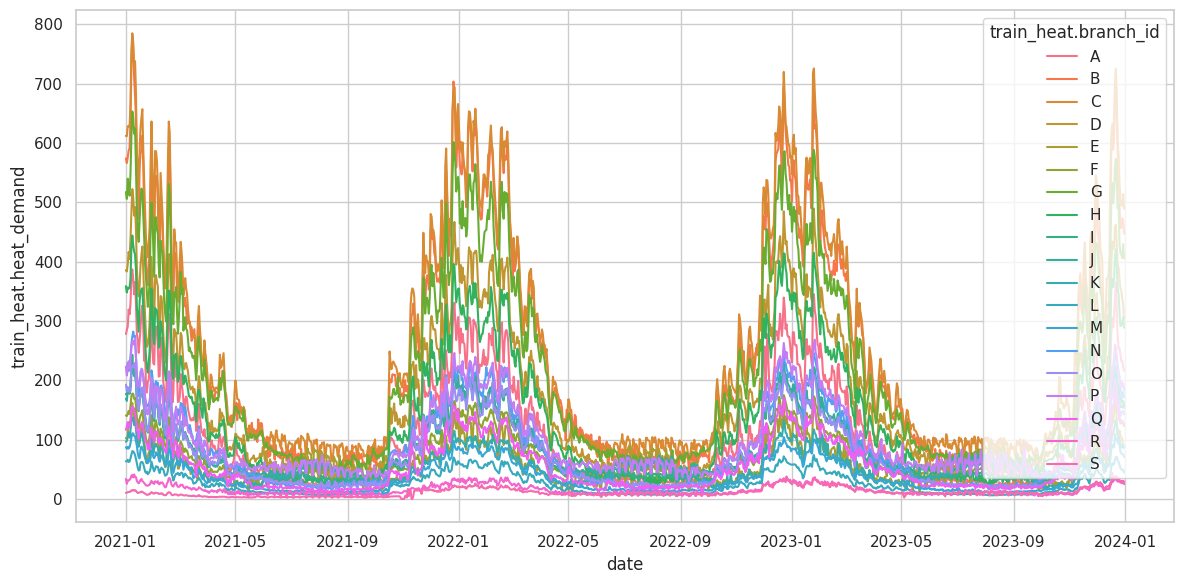

In [22]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_ts.groupby(by=['date', 'train_heat.branch_id'], observed=True).mean(numeric_only=True).reset_index(), x='date', y='train_heat.heat_demand', hue='train_heat.branch_id', ax=ax)

plt.tight_layout()
plt.show()

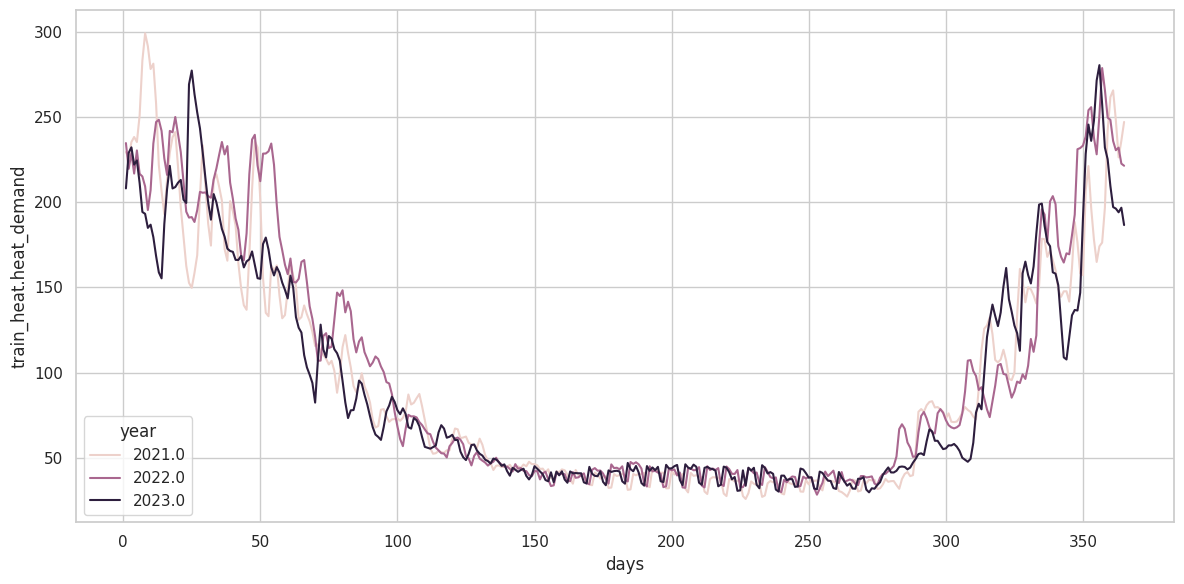

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(data=df_ts.groupby(by=['date']).mean(numeric_only=True), x='days', y='train_heat.heat_demand', hue='year', ax=ax)

plt.tight_layout()
plt.show()

In [24]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import root_mean_squared_error

In [25]:
df_X_raw = df_ts.drop(columns=['train_heat.heat_demand', 'train_heat.tm', 'date', 'year', 'month', 'day', 'days'])
df_y_raw = (df_ts['train_heat.heat_demand'] - df_ts['train_heat.heat_demand'].mean()) / df_ts['train_heat.heat_demand'].std()

In [26]:
categorical_columns = df_X_raw.columns[df_X_raw.dtypes == "category"]
print("Categorical features:", categorical_columns.tolist())

Categorical features: ['train_heat.branch_id']


In [27]:
ts_cv = TimeSeriesSplit(
    n_splits=5,
    gap=48,
    max_train_size=20000,
    test_size=1000,
)

In [28]:
all_splits = list(ts_cv.split(df_X_raw, df_y_raw))
idx_tr_0, idx_te_0 = all_splits[0]

In [29]:
X_tr_0 = df_X_raw.iloc[idx_tr_0]
y_tr_0 = df_y_raw.iloc[idx_tr_0]
X_te_0 = df_X_raw.iloc[idx_te_0]
y_te_0 = df_y_raw.iloc[idx_te_0]

In [30]:
X_tr_0

,train_heat.branch_id,train_heat.ta,train_heat.wd,train_heat.ws,train_heat.rn_day,train_heat.rn_hr1,train_heat.hm,train_heat.si,train_heat.ta_chi,hour
474253,S,1.5,88.8,0.3,0.0,0.0,86.9,0.05,1.5,8
474254,S,5.7,360.0,0.0,0.0,0.0,82.1,0.50,5.1,9
474255,S,11.6,257.9,1.9,0.0,0.0,68.1,1.14,10.9,10
474256,S,15.4,284.8,3.2,0.0,0.0,54.8,1.68,15.3,11
474257,S,16.8,327.7,5.8,0.0,0.0,50.8,2.03,16.9,12
...,...,...,...,...,...,...,...,...,...,...
494248,S,24.5,236.9,1.4,0.0,0.0,59.0,3.08,24.8,11
494249,S,26.8,276.8,2.4,0.0,0.0,49.2,3.45,26.0,12
494250,S,26.1,253.9,4.1,0.0,0.0,46.1,2.32,25.6,13
494251,S,24.6,259.2,3.3,0.0,0.0,43.0,0.90,24.2,14


In [31]:
y_tr_0

,train_heat.heat_demand
474253,-0.770907
474254,-0.779583
474255,-0.779583
474256,-0.779583
474257,-0.788258
...,...
494248,-0.753557
494249,-0.744881
494250,-0.744881
494251,-0.753557


In [32]:
one_hot_encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

In [33]:
## Ridge
ridge_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
        ],
        remainder=StandardScaler(),
    ),
    RidgeCV(alphas=np.logspace(-6, 6, 25)),
)

## GradientBoosting
gbr_pipeline = make_pipeline(
    ColumnTransformer(
        transformers=[
            ("categorical", one_hot_encoder, categorical_columns),
        ],
        remainder=StandardScaler(),
    ),
    HistGradientBoostingRegressor(categorical_features="from_dtype", random_state=2025),
)

In [34]:
ridge_pipeline = ridge_pipeline.fit(X_tr_0, y_tr_0)
gbr_pipeline = gbr_pipeline.fit(X_tr_0, y_tr_0)

In [35]:
ridge_te_0 = ridge_pipeline.predict(X_te_0)
gbr_te_0 = gbr_pipeline.predict(X_te_0)

In [36]:
print("RSME(test,ridge):", root_mean_squared_error(y_te_0, ridge_te_0))
print("RSME(test,gbr):", root_mean_squared_error(y_te_0, gbr_te_0))

RSME(test,ridge): 0.06252070748740635
RSME(test,gbr): 0.040957626430864875


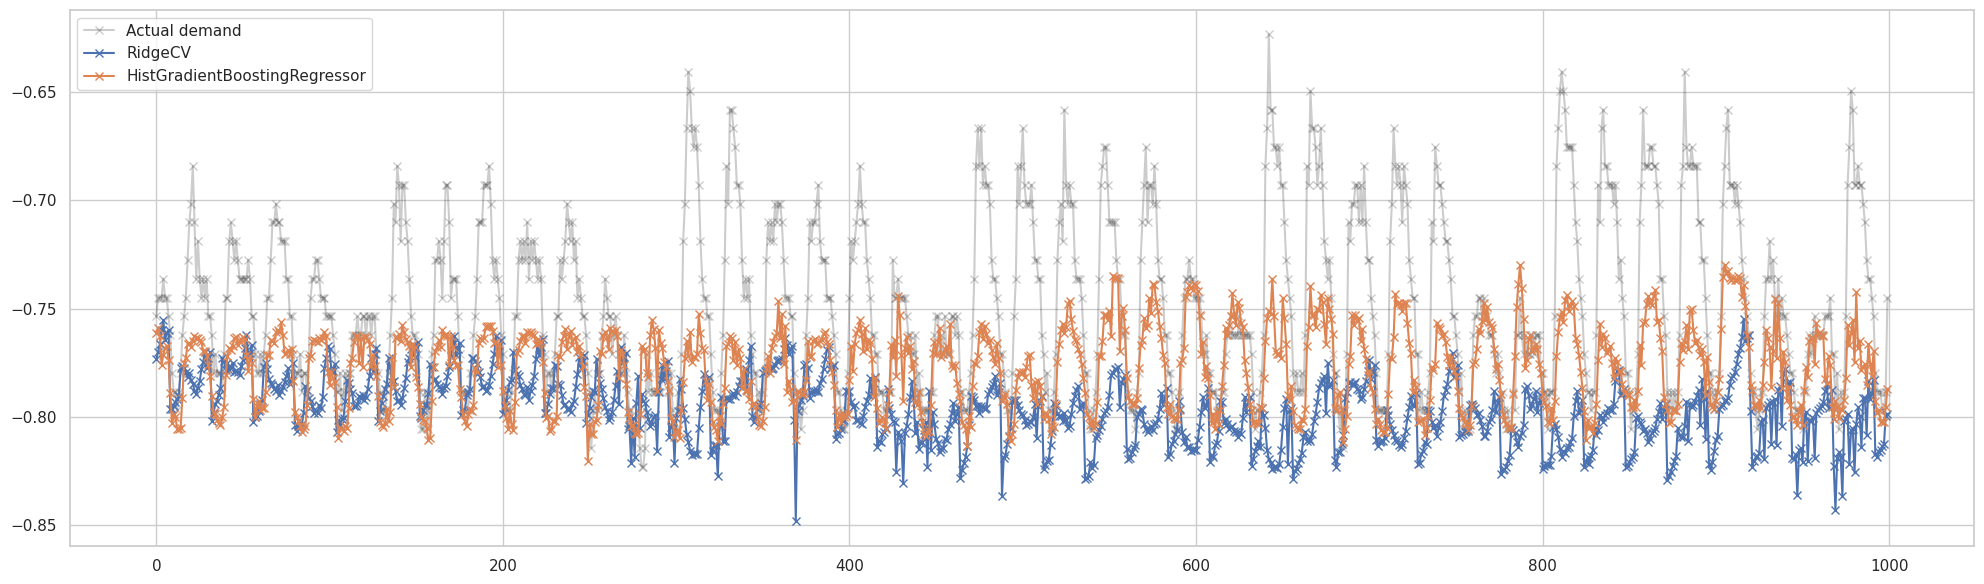

In [37]:
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(y_te_0.values, "x-", alpha=0.2, label="Actual demand", color="black")
ax.plot(ridge_te_0, "x-", label="RidgeCV")
ax.plot(gbr_te_0, "x-", label="HistGradientBoostingRegressor")

_ = ax.legend()
plt.tight_layout()
plt.show()